In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import warnings
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,Dropout,Bidirectional
from keras.optimizers import SGD,Adam
from keras.callbacks import Callback
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

%matplotlib inline
warnings.filterwarnings("ignore")

# Set seeds to make the experiment more reproducible.
from tensorflow.compat.v1.random import set_random_seed
from numpy.random import seed
set_random_seed(1)
seed(1)

Using TensorFlow backend.


In [0]:

import tensorflow as tf
from math import sqrt
from numpy import split
from numpy import mean
from numpy import array
from pandas import read_csv
import statistics
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.layers import Flatten,ConvLSTM2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import keras.backend as K

In [0]:
from scipy import stats

In [5]:
df = pd.read_csv('/content/sample_data/climate_data2.csv',sep = ';',infer_datetime_format=True,header = 0, parse_dates=['# Date'])
#dataset.head()
df['# Date'] = pd.to_datetime(df['# Date'])
df = df.set_index("# Date")
type(df.index)
df.head()

,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,,
1980-01-01,24:00,284.55,76.59,968.48,3.61,113.37,5.203010,0.4192,0.000396,2157.781
1980-01-02,24:00,284.81,56.53,971.38,1.07,62.33,0.140569,0.0000,0.000535,3758.814
1980-01-03,24:00,284.46,44.87,973.32,0.93,344.69,0.000000,0.0000,0.000280,4024.862
1980-01-04,24:00,285.08,37.16,974.53,0.26,317.64,0.000000,0.0000,0.000155,4109.105
1980-01-05,24:00,283.85,38.61,974.07,1.70,295.94,0.000000,0.0000,0.000071,4146.958


In [6]:
df = df.drop('UT time',axis = 1)
df.head()

,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,
1980-01-01,284.55,76.59,968.48,3.61,113.37,5.203010,0.4192,0.000396,2157.781
1980-01-02,284.81,56.53,971.38,1.07,62.33,0.140569,0.0000,0.000535,3758.814
1980-01-03,284.46,44.87,973.32,0.93,344.69,0.000000,0.0000,0.000280,4024.862
1980-01-04,285.08,37.16,974.53,0.26,317.64,0.000000,0.0000,0.000155,4109.105
1980-01-05,283.85,38.61,974.07,1.70,295.94,0.000000,0.0000,0.000071,4146.958


In [0]:
df = df[['Rainfall','Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation']]

In [8]:
z = np.abs(stats.zscore(df))
print(z)
z.max()

[[0.5262923  1.72391599 1.5743976  ... 1.16772797 1.24289973 2.11206065]
 [0.20048662 1.68871899 0.61026602 ... 0.79537119 1.76877937 1.12750159]
 [0.22066712 1.73609956 0.04985853 ... 0.90357351 1.14045605 0.96389473]
 ...
 [0.22058831 0.51774204 0.40407836 ... 1.90968671 0.78705339 0.90012003]
 [0.22066712 0.61114945 0.45454387 ... 0.75810492 0.71946385 0.237695  ]
 [0.17793231 0.34175707 0.46367572 ... 0.63444513 0.9894099  0.26548347]]


38.24327819750121

In [9]:
threshold = 3
print(np.where(z > 3))

(array([   54,    55,   114,   194,   195,   209,   211,   214,   218,
         249,   444,   464,   465,   529,   559,   560,   562,   563,
         565,   566,   574,   575,   672,   789,   790,   813,   860,
         862,   947,  1092,  1122,  1200,  1200,  1201,  1303,  1303,
        1304,  1304,  1339,  1362,  1509,  1510,  1521,  1528,  1582,
        1583,  1603,  1604,  1681,  1706,  1707,  1882,  1883,  2037,
        2042,  2043,  2044,  2108,  2232,  2276,  2296,  2652,  2677,
        2678,  2979,  2992,  2992,  3002,  3068,  3115,  3124,  3134,
        3135,  3142,  3153,  3158,  3187,  3188,  3189,  3294,  3383,
        3384,  3388,  3415,  3416,  3482,  3483,  3497,  3498,  3526,
        3527,  3751,  3766,  3829,  3837,  3902,  4015,  4015,  4124,
        4137,  4143,  4150,  4160,  4375,  4458,  4509,  4510,  4589,
        4613,  4636,  4792,  4804,  4824,  4830,  4854,  4855,  4939,
        4939,  4940,  4946,  4950,  4951,  4997,  5124,  5125,  5164,
        5189,  5190

In [0]:
rows,columns = np.where(z>3)

In [0]:
for row,column in zip(rows,columns):
  if column == 0:
    df.iloc[row,column] = 0.931113
  if column == 4:
    df.iloc[row,column] = 2.057803

In [0]:
dataset = df.copy()

In [13]:
dataset = dataset[['Rainfall','Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation']]
dataset.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958


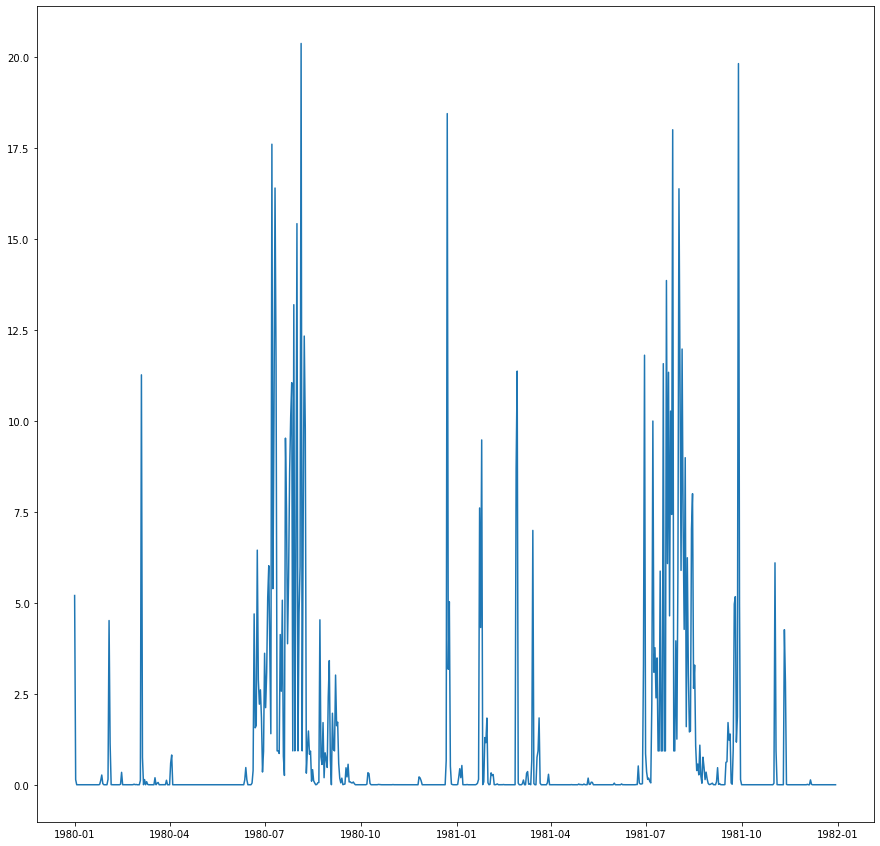

In [14]:
fig =plt.figure(figsize = (15,15))
plt.plot(dataset['Rainfall'][:730])
plt.show()

In [0]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=10, verbose=1)
callbacks = [callback_early_stopping,
             callback_reduce_lr]

In [15]:
len(dataset) - 12537

2164

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-2164], data[-2164:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='simple_lstm'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),callbacks = callbacks )
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [19]:

def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [70]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 70, 256, 0, 0.1]] 0.107
done
[6, 64, 3, 70, 256, 0, 0.1] 0.10660083625112837


KeyError: ignored

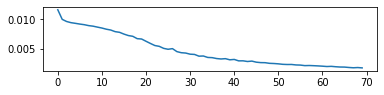

In [20]:
plot_history(model_history[0])

In [0]:
model_history[0].history.keys()

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mean_absolute_percentage_error', 'loss', 'root_mean_squared_error', 'mean_absolute_percentage_error'])

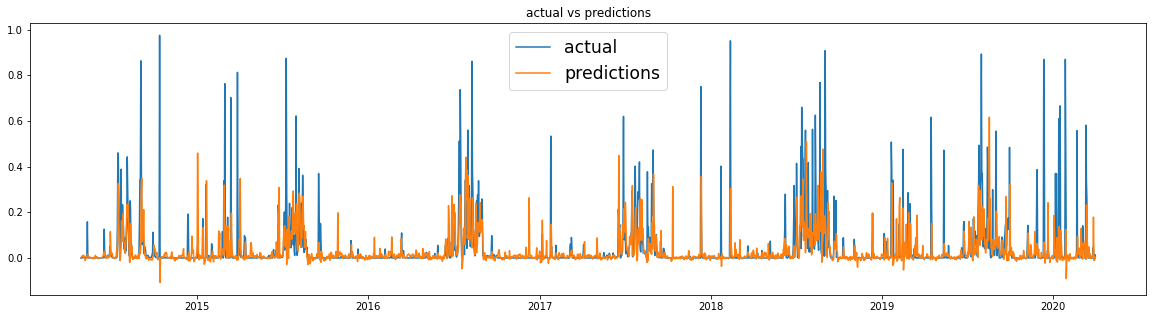

In [21]:
predictions = np.reshape(np.array(predictions),(2164,1))
indices = dataset.index.tolist()[-2164:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
type(test)

pandas.core.frame.DataFrame

In [22]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.377


In [24]:
indices = dataset.index.tolist()[-2164:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


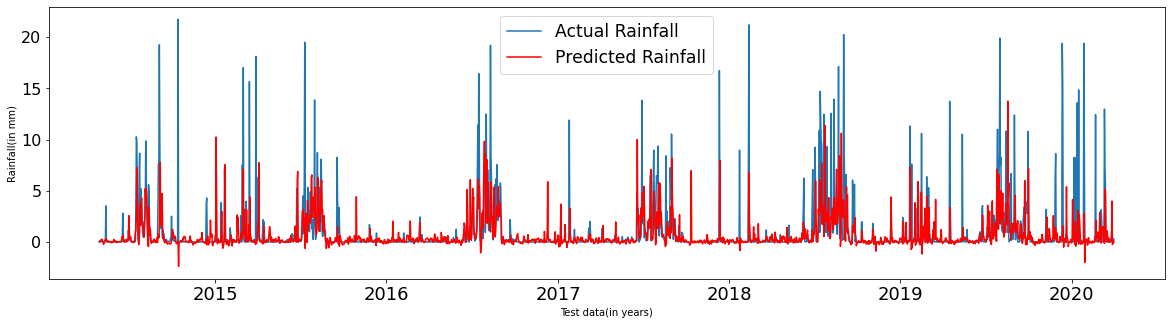

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-2164:], df_test['Rainfall'][-2164:],label = 'Actual Rainfall')
plt.plot(df_test.index[-2164:], df_test['Prediction'][-2164:], color='r',label = 'Predicted Rainfall')
plt.legend(loc='best', fontsize='xx-large')
plt.xlabel('Test data(in years)')
plt.ylabel('Rainfall(in mm)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

No handles with labels found to put in legend.


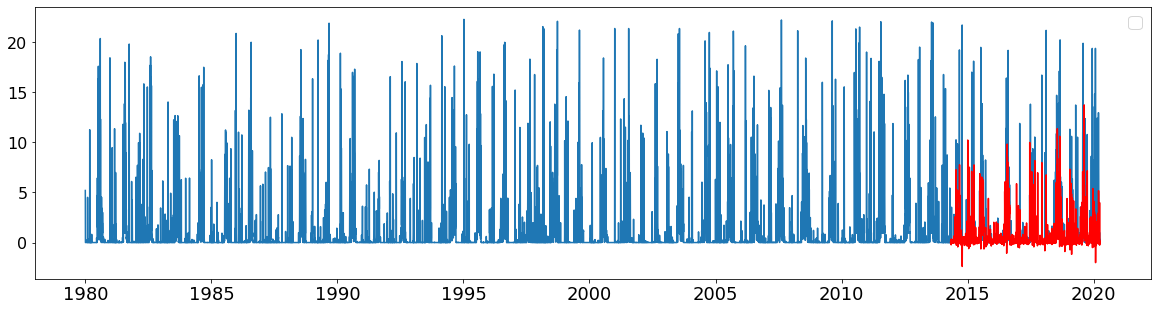

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Rainfall'])
plt.plot(df_test.index[-2164:], df_test['Prediction'][-2164:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-2164], data[-2164:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(200,dropout=drop,recurrent_dropout=drop, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='simple_lstmMinmax'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_data = (valid_x,valid_y),verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = ((len(valid_x)//n_batch)),callbacks=  callbacks)
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [42]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [70]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 00040: early stopping
> Model[[6, 64, 3, 70, 256, 0, 0.1]] 0.115
done
[6, 64, 3, 70, 256, 0, 0.1] 0.11502412918787744


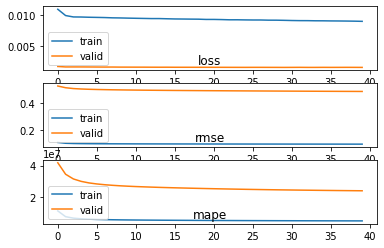

In [43]:
plot_history(model_history[0])

In [0]:
dataset['Rainfall']

# Date
1980-01-01     5.203010
1980-01-02     0.140569
1980-01-03     0.000000
1980-01-04     0.000000
1980-01-05     0.000000
                ...    
2020-03-27    22.828993
2020-03-28     0.179407
2020-03-29     0.000549
2020-03-30     0.000000
2020-03-31     0.297673
Name: Rainfall, Length: 14701, dtype: float64

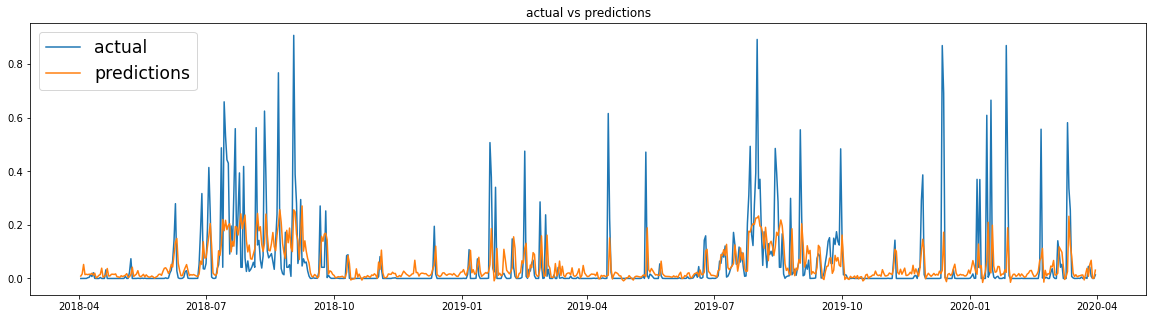

In [44]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
max(predictions.values)

array([0.14205712], dtype=float32)

In [45]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.565


In [0]:
dataset.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958


In [0]:
max(inv_yhat)

38.06050010042596

In [46]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


In [0]:
min(inv_yhat)

-3.200098137820244

No handles with labels found to put in legend.


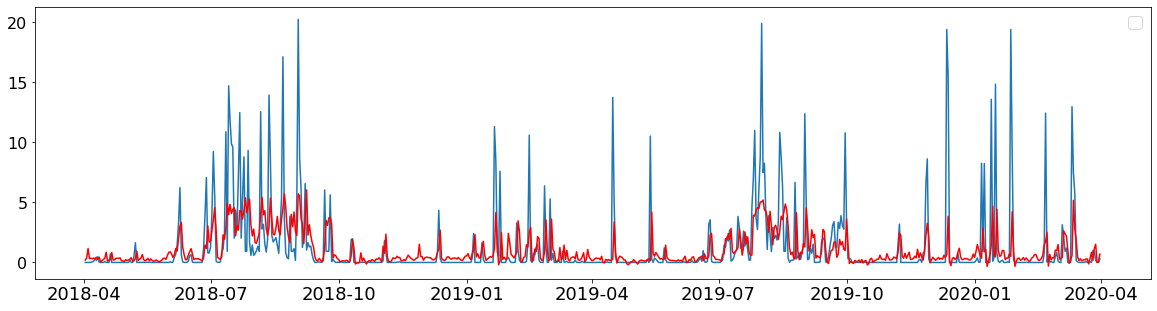

In [47]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

No handles with labels found to put in legend.


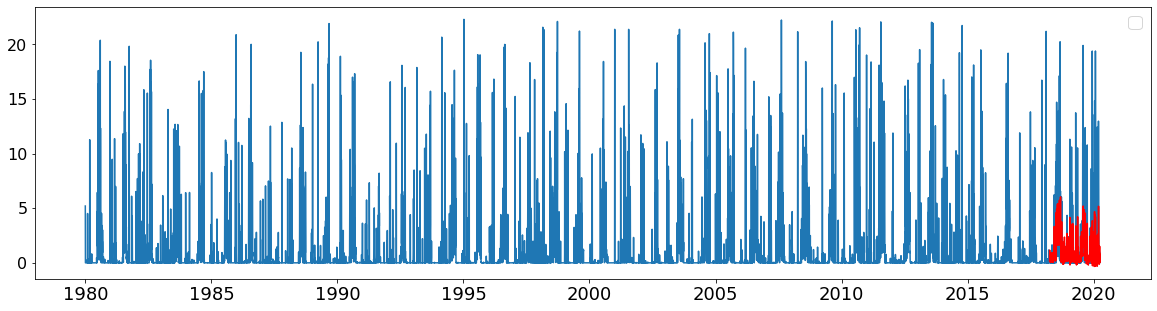

In [48]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Rainfall'])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  #scaler  = MinMaxScaler(feature_range=(0,1))
  scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(200,dropout=drop,recurrent_dropout=drop, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='multiheaded_cnn'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.1,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.1)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [0]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [35]
  n_batch = [128]
  n_diff = [0]
  drop = [0.2]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 35, 128, 0, 0.2]] 1.110
done
[6, 64, 3, 35, 128, 0, 0.2] 1.1101393095165482


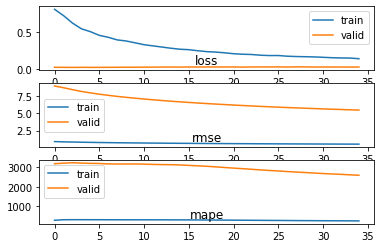

In [0]:
plot_history(model_history[0])

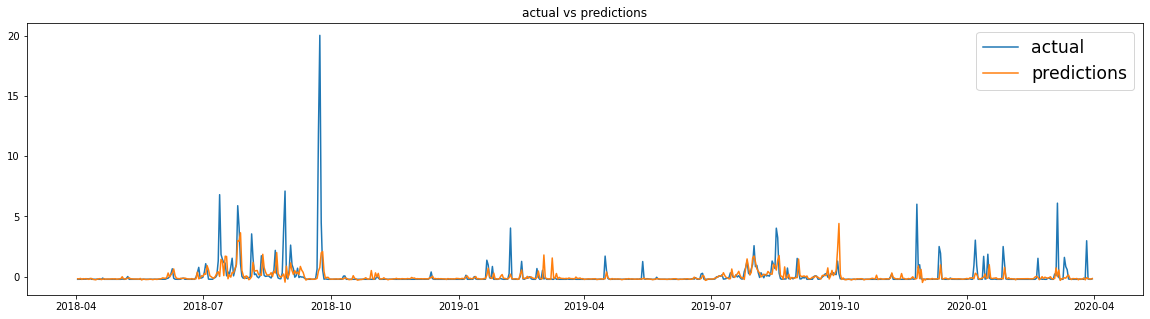

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.916


In [0]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


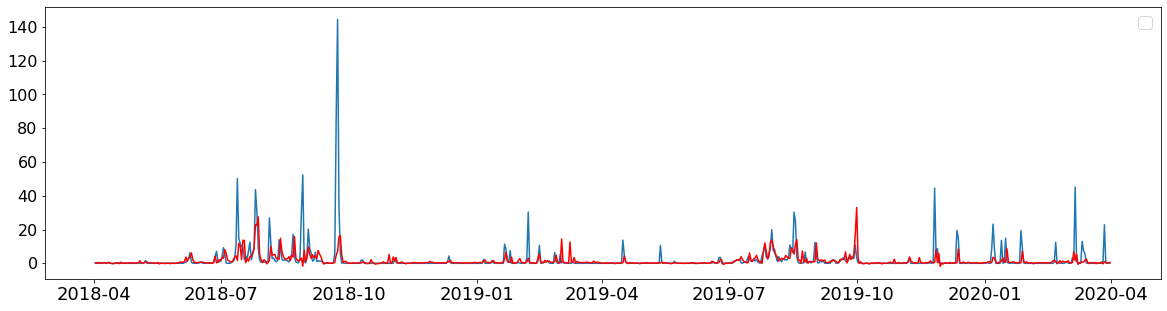

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
 #split a univariate dataset into train/test sets
def split_dataset(data):
  #scaler  = MinMaxScaler(feature_range=(0,1))
  scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), pstdev(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(200,dropout=drop,recurrent_dropout=drop, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='multiheaded_cnn'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_data = (valid_x,valid_y),verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = ((len(valid_x)//n_batch)))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [0]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [35]
  n_batch = [128]
  n_diff = [0]
  drop = [0.2]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 35, 128, 0, 0.2]] 1.084
done
[6, 64, 3, 35, 128, 0, 0.2] 1.0843318359478187


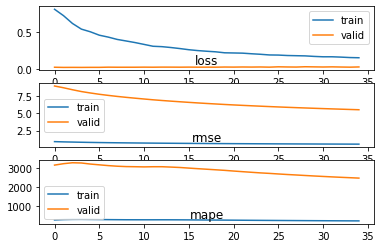

In [0]:
plot_history(model_history[0])

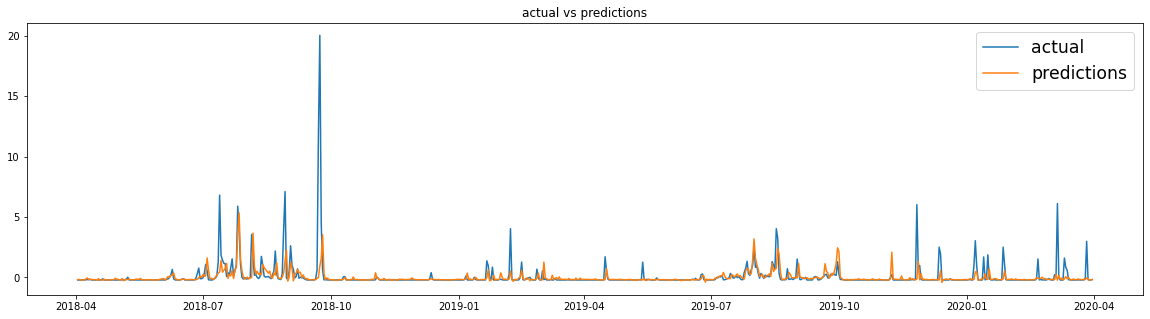

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.732


In [0]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


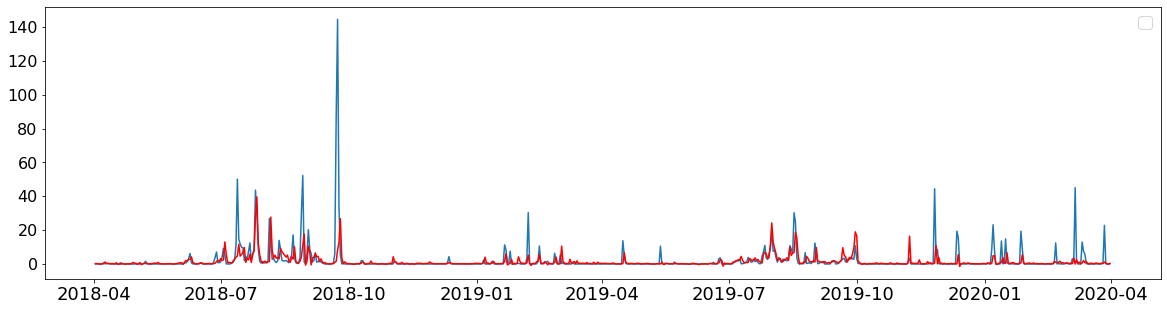

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# multi headed cnn

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler = MinMaxScaler(feature_range = (0,1))
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-2164], data[-2164:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
#def summarize_scores(name, score, scores):
 # s_scores = ', '.join(['%.1f' % s for s in scores])
  #print('%s: [%.3f] %s' % (name, score, s_scores))
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(2, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(2, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='test')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  in_layers, out_layers = list(), list()
  for _ in range(n_features):
    inputs = Input(shape=(n_timesteps,1))
    conv1 = Conv1D(n_filters, n_kernels, activation='relu')(inputs)
    drop1 = Dropout(drop)
    conv2 = Conv1D(n_filters, n_kernels, activation='relu')(conv1)
    drop2 = Dropout(drop)
    pool1 = MaxPooling1D()(conv2)
    flat = Flatten()(pool1)
    # store layers
    in_layers.append(inputs)
    out_layers.append(flat)
  # merge heads
  merged = concatenate(out_layers)
  # interpretation
  dense1 = Dense(256, activation='relu')(merged)
  dense2 = Dense(100, activation='relu')(dense1)
  outputs = Dense(n_outputs)(dense2)
  model = Model(inputs=in_layers, outputs=outputs)
  # compile model
  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='multiheaded_cnn'+str(cfg) +'.png')
  # fit network
  input_data = [train_x[:,:,i].reshape((train_x.shape[0],n_timesteps,1)) for i in
  range(n_features)]
  #valid_data = [valid_x[:,:,i].reshape((valid_x.shape[0],n_timesteps,1)) for i in
  #range(n_features)]
  model_history = model.fit(input_data, train_y, epochs=n_epochs, batch_size= None,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),callbacks = callbacks)
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into n input arrays
  input_x = [input_x[:,i].reshape((1,input_x.shape[0],1)) for i in range(input_x.shape[1])]
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions
    

In [29]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [70]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 70, 256, 0, 0.1]] 0.115
done
[6, 64, 3, 70, 256, 0, 0.1] 0.11505585750503748


KeyError: ignored

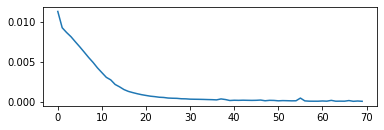

In [30]:
plot_history(model_history[0])

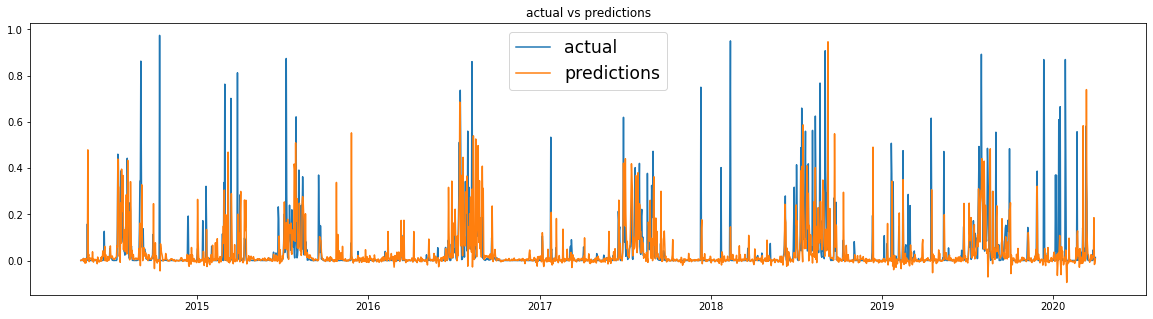

In [31]:
predictions = np.reshape(np.array(predictions),(2164,1))
indices = dataset.index.tolist()[-2164:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [32]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.566


In [33]:
indices = dataset.index.tolist()[-2164:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


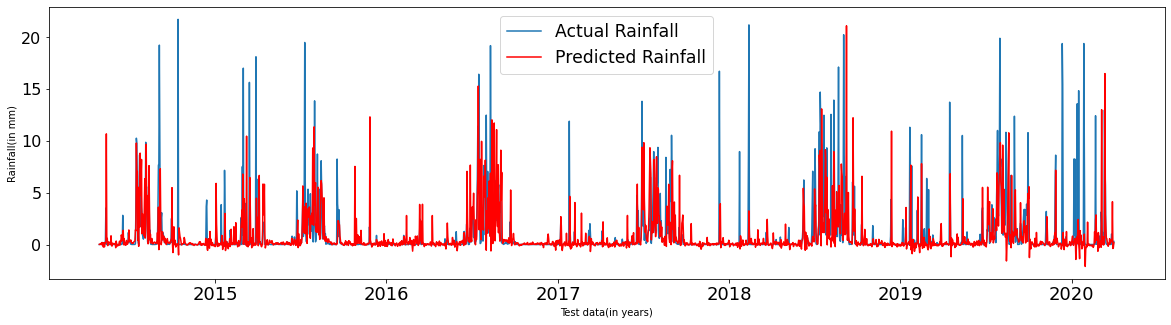

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-2164:], df_test['Rainfall'][-2164:],label = 'Actual Rainfall')
plt.plot(df_test.index[-2164:], df_test['Prediction'][-2164:], color='r',label = 'Predicted Rainfall')
plt.legend(loc='best', fontsize='xx-large')
plt.xlabel('Test data(in years)')
plt.ylabel('Rainfall(in mm)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# ENCODER-DECODER LSTM

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  predicted = predicted.reshape((actual.shape[0],))
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  m = [f[1] for f in scores]
  (scores_m, score_std) = statistics.mean(m), statistics.pstdev(m)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(m)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  #pyplot.subplot(3, 1, 3)
  #pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  #pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  #pyplot.title('mape', y=0, loc='center')
  #pyplot.legend()
  #pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  #valid_y = valid_y.reshape((valid_y.shape[0], valid_y.shape[1], 1))
  # define model
  model = Sequential()
  model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(200, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))


  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='multiheaded_cnn'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.1,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.1)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [0]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [30]
  n_batch = [128]
  n_diff = [0]
  drop = [0.2]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 30, 128, 0, 0.2]] 0.037
done
[6, 64, 3, 30, 128, 0, 0.2] 0.037067446848812746


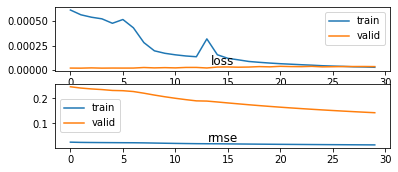

In [0]:
plot_history(model_history[0])

encoder-decoder lstm: 0.037 RMSE (+/- 0.000)


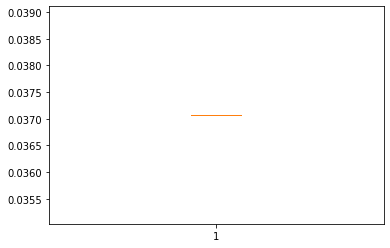

In [0]:
summarize_scores('encoder-decoder lstm',scores)

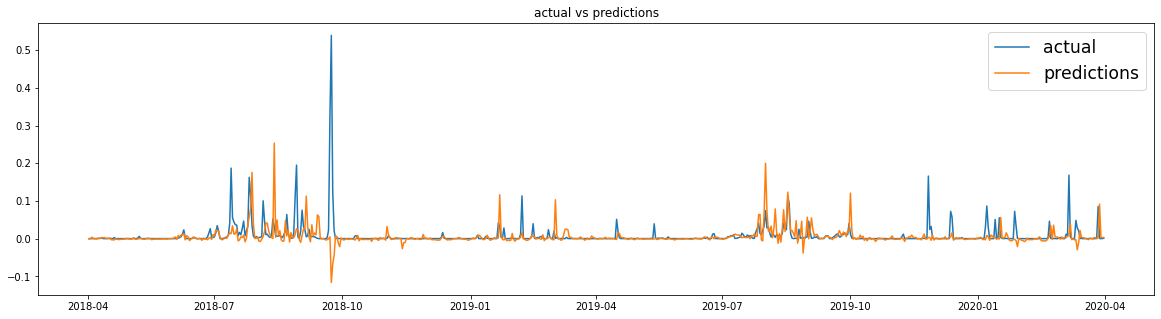

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.931


In [0]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


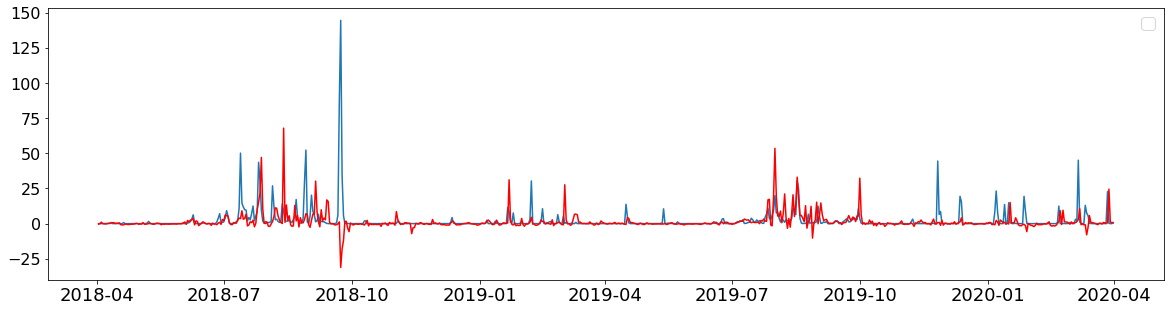

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-2164], data[-2164:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  predicted = predicted.reshape((actual.shape[0],))
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  m = [f[1] for f in scores]
  (scores_m, score_std) = statistics.mean(m), statistics.pstdev(m)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(m)
  pyplot.show()
   
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  #pyplot.subplot(3, 1, 3)
  #pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  #pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  #pyplot.title('mape', y=0, loc='center')
  #pyplot.legend()
  #pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  valid_y = valid_y.reshape((valid_y.shape[0], valid_y.shape[1], 1))
  # define model
  model = Sequential()
  model.add(LSTM(512, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(512, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))


  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='encoder_decoderlstmMinMax'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),callbacks = callbacks)
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [18]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [70]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 70, 256, 0, 0.1]] 0.124
done
[6, 64, 3, 70, 256, 0, 0.1] 0.12386736490930483


KeyError: ignored

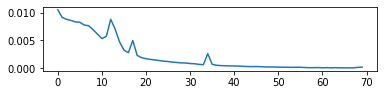

In [19]:
plot_history(model_history[0])

encoder-decoder lstm: 0.031 RMSE (+/- 0.000)


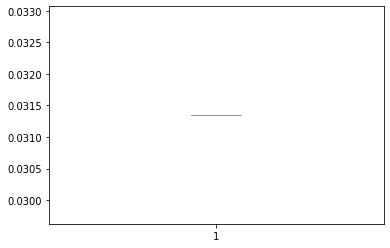

In [0]:
summarize_scores('encoder-decoder lstm',scores)

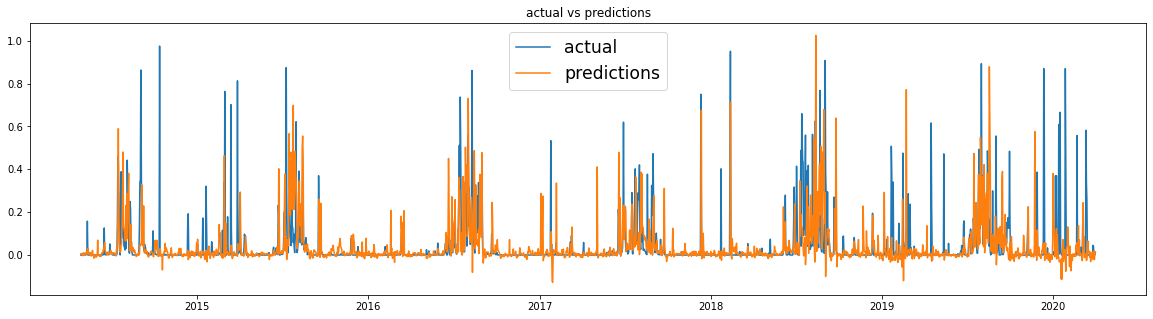

In [20]:
predictions = np.reshape(np.array(predictions),(2164,1))
indices = dataset.index.tolist()[-2164:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [21]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.762


In [22]:
indices = dataset.index.tolist()[-2164:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


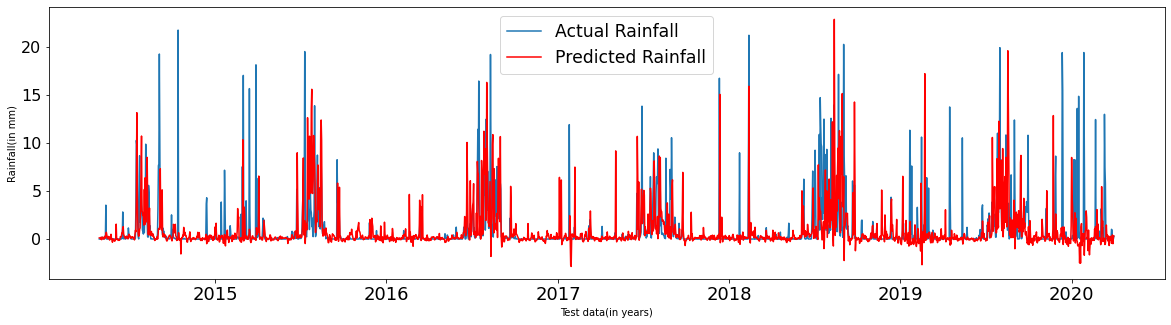

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-2164:], df_test['Rainfall'][-2164:],label = 'Actual Rainfall')
plt.plot(df_test.index[-2164:], df_test['Prediction'][-2164:], color='r',label = 'Predicted Rainfall')
plt.legend(loc='best', fontsize='xx-large')
plt.xlabel('Test data(in years)')
plt.ylabel('Rainfall(in mm)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.figure(figsize = (20,10))
        plt.plot(self.history['iterations'], self.history['lr'],)
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.figure(figsize = (20,10))
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  #scaler  = MinMaxScaler(feature_range=(0,1))
  scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  predicted = predicted.reshape((actual.shape[0],))
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  m = [f[1] for f in scores]
  (scores_m, score_std) = statistics.mean(m), statistics.pstdev(m)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(m)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  #pyplot.subplot(3, 1, 3)
  #pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  #pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  #pyplot.title('mape', y=0, loc='center')
  #pyplot.legend()
  #pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  valid_y = valid_y.reshape((valid_y.shape[0], valid_y.shape[1], 1))
  # define model
  model = Sequential()
  model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(200, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))
  lr_finder = LRFinder(min_lr=1e-7, 
                                 max_lr=1e-1, 
                                 steps_per_epoch=np.ceil(len(train_x/n_batch), 
                                 epochs=5)
  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])                               
  model_history = model.fit(train_x, train_y, callbacks=[lr_finder])
            
  lr_finder.plot_loss()

  #model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='multiheaded_cnn'+str(cfg) +'.png')
  # fit network
  
  #model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.1,verbose=0,
        #                    steps_per_epoch=(len(train_x)//n_batch),validation_steps = (len(valid_x)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [0]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [40]
  n_batch = [128]
  n_diff = [0]
  drop = [0.2]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1


NameError: ignored

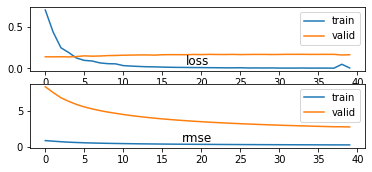

In [0]:
plot_history(model_history[0])

encoder-decoder lstm: 1.220 RMSE (+/- 0.000)


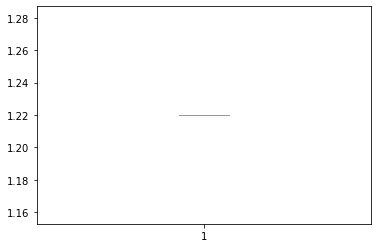

In [0]:
summarize_scores('encoder-decoder lstm',scores)

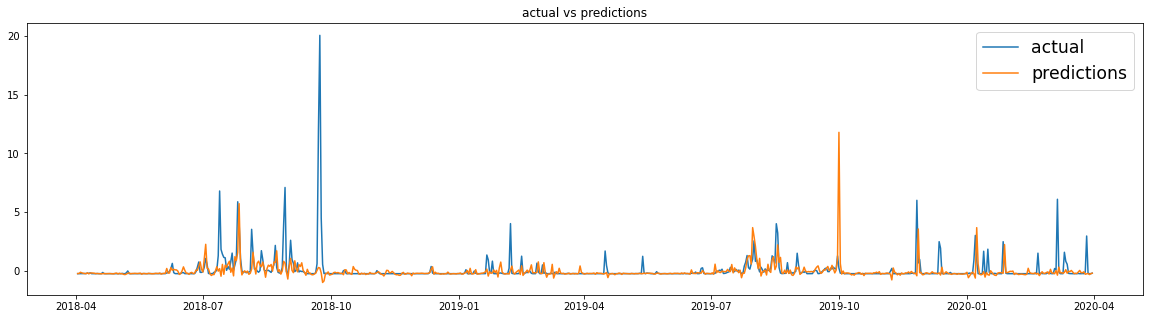

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.699


In [0]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


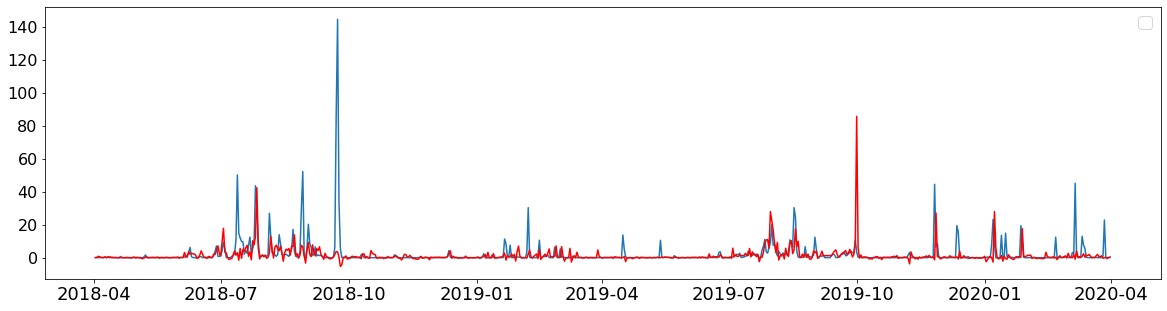

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:



class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency.
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    The amplitude of the cycle can be scaled on a per-iteration or
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each
        cycle iteration.
    For more detail, please see paper.
    # Example for CIFAR-10 w/ batch size 100:
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    # References
      - [Cyclical Learning Rates for Training Neural Networks](
      https://arxiv.org/abs/1506.01186)
    """

    def __init__(
            self,
            base_lr=0.001,
            max_lr=0.006,
            step_size=2000.,
            mode='triangular',
            gamma=1.,
            scale_fn=None,
            scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        if mode not in ['triangular', 'triangular2',
                        'exp_range']:
            raise KeyError("mode must be one of 'triangular', "
                           "'triangular2', or 'exp_range'")
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn is None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1 / (2.**(x - 1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma ** x
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr is not None:
            self.base_lr = new_base_lr
        if new_max_lr is not None:
            self.max_lr = new_max_lr
        if new_step_size is not None:
            self.step_size = new_step_size
        self.clr_iterations = 0.

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr - self.base_lr) * \
                np.maximum(0, (1 - x)) * self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr - self.base_lr) * \
                np.maximum(0, (1 - x)) * self.scale_fn(self.clr_iterations)

    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())

    def on_batch_end(self, epoch, logs=None):

        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1
        K.set_value(self.model.optimizer.lr, self.clr())

        self.history.setdefault(
            'lr', []).append(
            K.get_value(
                self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

# CNN-LSTM ENCODER DECODER

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12537])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:12573].std(axis=0)
  #data /= std
  train, test= data[:-2164], data[-2164:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  predicted = predicted.reshape((actual.shape[0],))
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  m = [f[1] for f in scores]
  (scores_m, score_std) = statistics.mean(m), statistics.pstdev(m)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(m)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.figure(figsize=  (20,20))
  pyplot.subplot(3, 1, 1,)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  #pyplot.subplot(3, 1, 3)
  #pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  #pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  #pyplot.title('mape', y=0, loc='center')
  #pyplot.legend()
  #pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.3,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  #valid_y = valid_y.reshape((valid_y.shape[0], valid_y.shape[1], 1))
  # define model
  model = Sequential()
  model.add(Conv1D(n_filters, n_kernels, activation='relu', input_shape=(n_timesteps,n_features)))
  model.add(Dropout(drop))
  model.add(Conv1D(n_filters, n_kernels, activation='relu'))
  model.add(Dropout(drop))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))
  
  #lr_finder = LRFinder(min_lr=1e-7, 
                   #              max_lr=1e-1, 
                   #              steps_per_epoch=np.ceil(len(train_x)/n_batch), 
                   #            epochs=n_epochs)
  
  
  # MIN_LR = 1e-6
  # MAX_LR = 1e-3
  # STEP_SIZE = 8
  # CLR_METHOD = "triangular"
  # stepSize = STEP_SIZE * (train_x.shape[0] // n_batch)
  # clr = CyclicLR(base_lr=MIN_LR, max_lr=MAX_LR,
  #                               step_size=stepSize , mode=CLR_METHOD)
  #model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])                               
  #model_history = model.fit(train_x, train_y, callbacks=[lr_finder])
            
  #lr_finder.plot_loss()
  #lr_finder.plot_lr()

  model.compile(loss='mse', optimizer='adam' ,metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='cnn_lstm_encoder_decoder_MinMax'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None,verbose=1,
                           steps_per_epoch=(len(train_x)//n_batch),callbacks = callbacks)
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [36]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [70]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
#print(train.shape,test.shape)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
 print(cfg, error)

Total configs: 1
Epoch 1/70
48/48 [==============================] - 3s 72ms/step - loss: 0.0115 - root_mean_squared_error: 0.1130
Epoch 2/70
48/48 [==============================] - 3s 58ms/step - loss: 0.0100 - root_mean_squared_error: 0.1051
Epoch 3/70
48/48 [==============================] - 3s 58ms/step - loss: 0.0096 - root_mean_squared_error: 0.1027
Epoch 4/70
48/48 [==============================] - 3s 58ms/step - loss: 0.0091 - root_mean_squared_error: 0.1010
Epoch 5/70
48/48 [==============================] - 3s 58ms/step - loss: 0.0085 - root_mean_squared_error: 0.0994
Epoch 6/70
48/48 [==============================] - 3s 59ms/step - loss: 0.0077 - root_mean_squared_error: 0.0978
Epoch 7/70
48/48 [==============================] - 3s 59ms/step - loss: 0.0070 - root_mean_squared_error: 0.0961
Epoch 8/70
48/48 [==============================] - 3s 59ms/step - loss: 0.0064 - root_mean_squared_error: 0.0943
Epoch 9/70
48/48 [==============================] - 3s 59ms/step - loss

KeyError: ignored

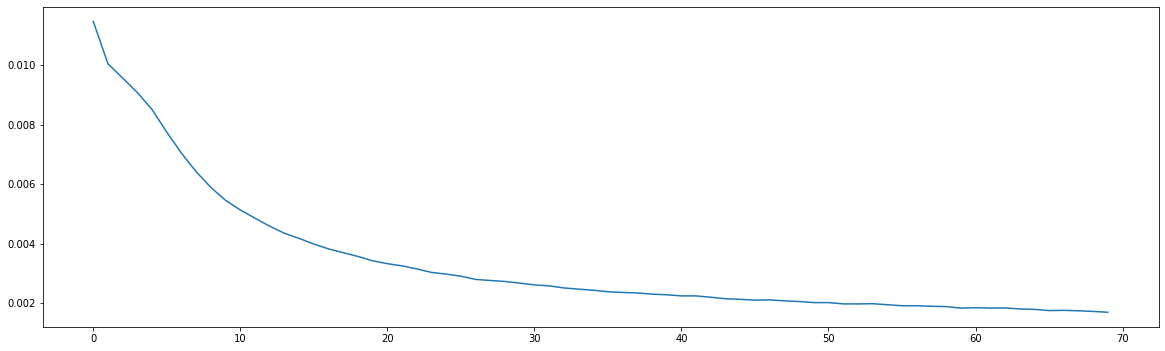

In [37]:
plot_history(model_history[0])

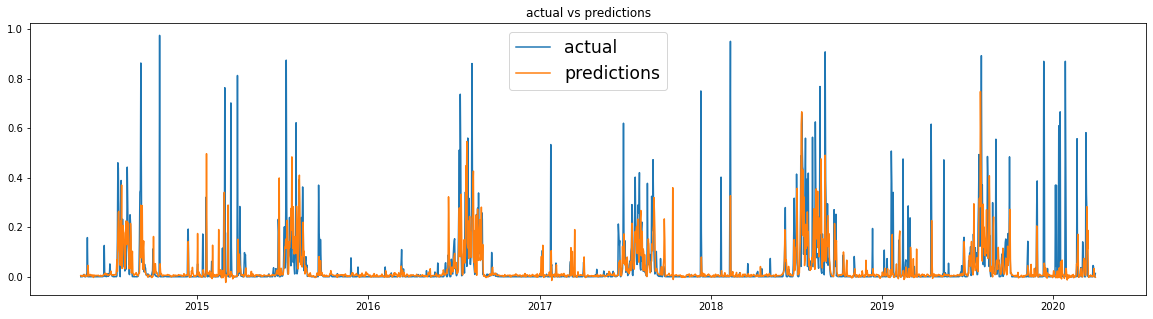

In [38]:
predictions = np.reshape(np.array(predictions),(2164,1))
indices = dataset.index.tolist()[-2164:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [39]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.317


In [40]:
indices = dataset.index.tolist()[-2164:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


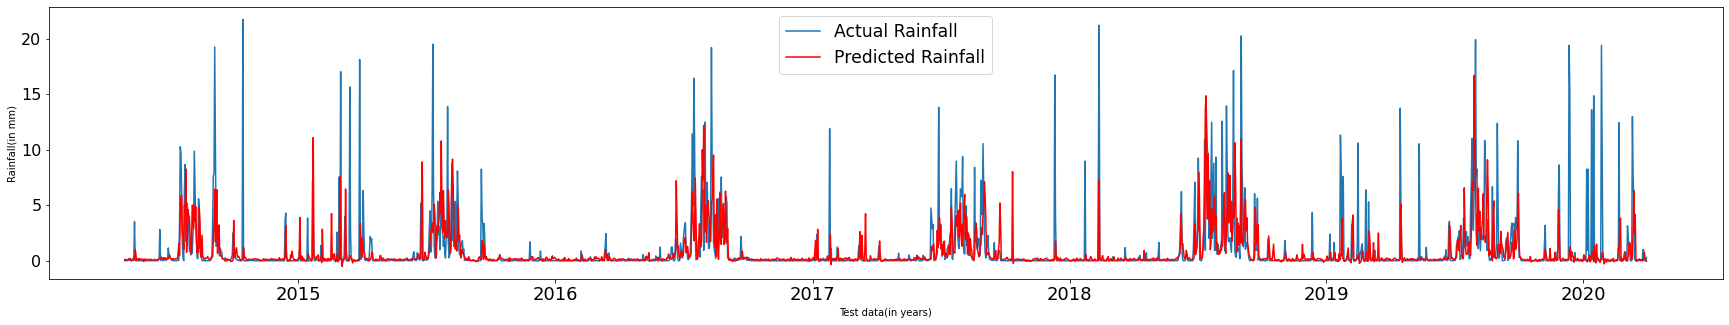

In [41]:
plt.figure(figsize=(30, 5))
plt.plot(df_test.index[-2164:], df_test['Rainfall'][-2164:],label = 'Actual Rainfall')
plt.plot(df_test.index[-2164:], df_test['Prediction'][-2164:], color='r',label = 'Predicted Rainfall')
plt.legend(loc='best', fontsize='xx-large')
plt.xlabel('Test data(in years)')
plt.ylabel('Rainfall(in mm)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# SGD IS NOT GOOD

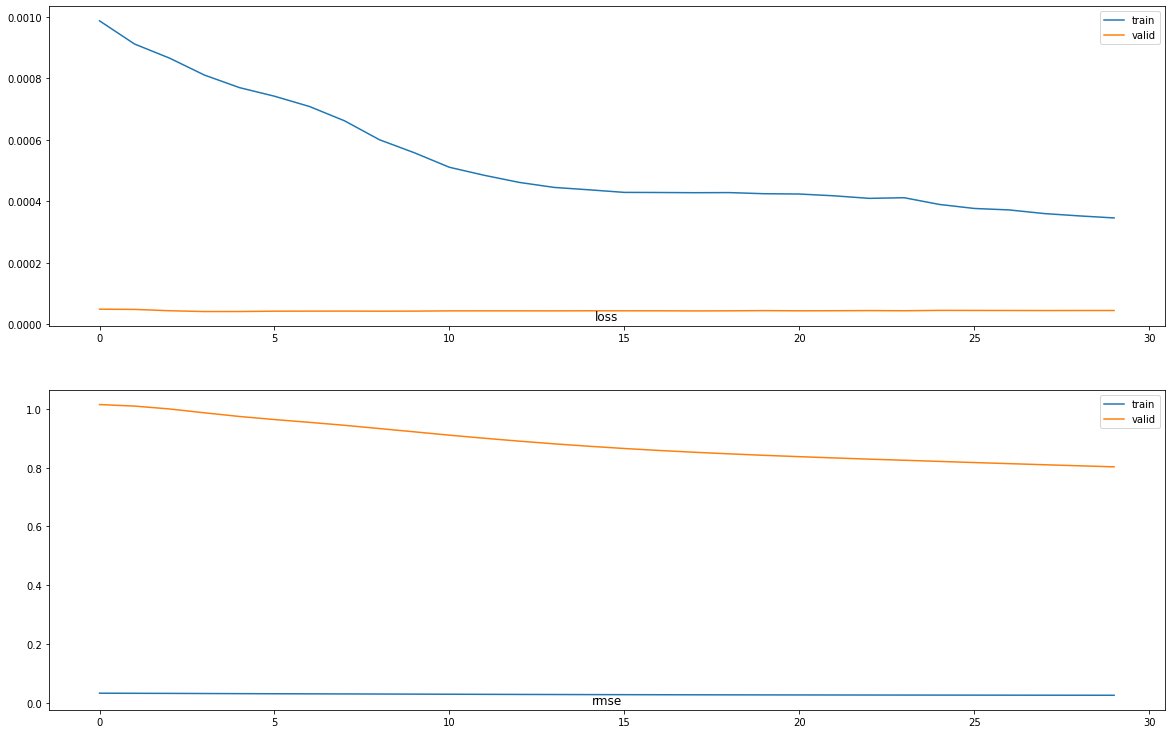

In [0]:
plot_history(model_history[0])

encoder-decoder lstm: 0.040 RMSE (+/- 0.000)


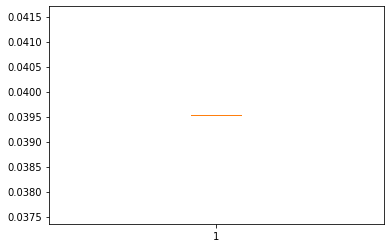

In [0]:
summarize_scores('encoder-decoder lstm',scores)

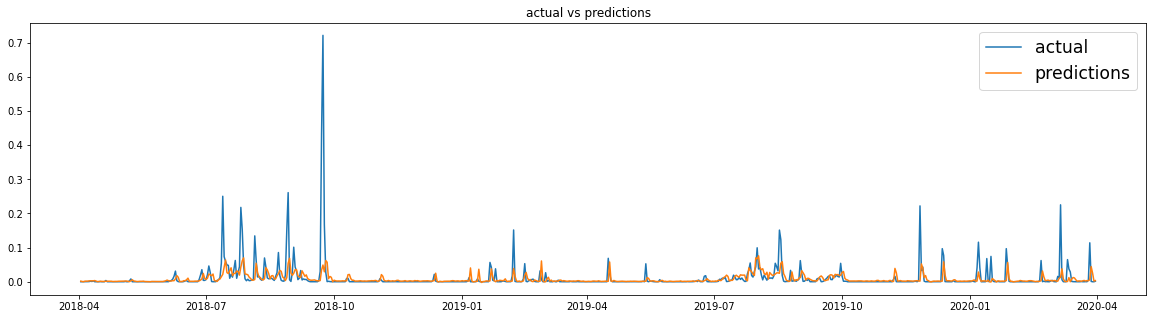

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.718


In [0]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


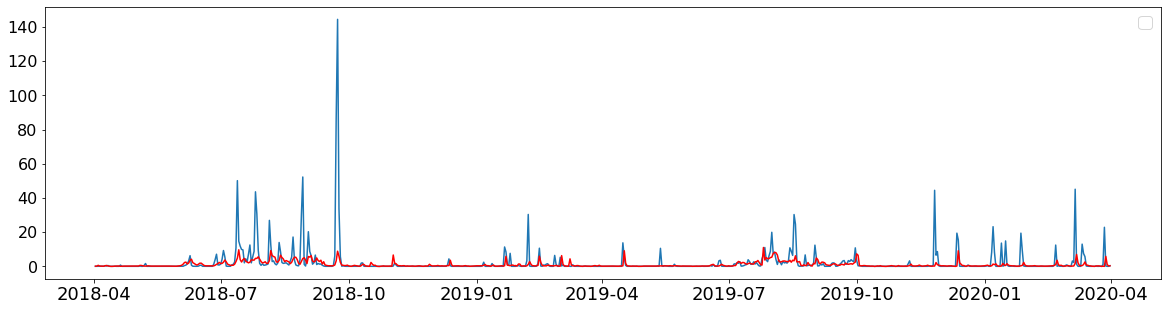

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  #scaler.fit(data[:9779])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:12573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  #train = scaler.transform(train)
  #test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  predicted = predicted.reshape((actual.shape[0],))
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  m = [f[1] for f in scores]
  (scores_m, score_std) = statistics.mean(m), statistics.pstdev(m)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(m)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.figure(figsize=  (20,20))
  pyplot.subplot(3, 1, 1,)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  #pyplot.subplot(3, 1, 3)
  #pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  #pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  #pyplot.title('mape', y=0, loc='center')
  #pyplot.legend()
  #pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.3,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # reshape into subsequences [samples, timesteps, rows, cols, channels]
  n_steps = 2;n_length =3
  train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
  #valid_x = valid_x.reshape((valid_x.shape[0], n_steps, 1, n_length, n_features)) 
  # create a channel for each variable
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  #valid_y = valid_y.reshape((valid_y.shape[0], valid_y.shape[1], 1))
  # define model
  model = Sequential()
  model.add(ConvLSTM2D(64, (1,3), activation='relu', input_shape=(n_steps, 1, n_length,
  n_features)))
  model.add(Flatten())
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(200, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))

  model.compile(loss='mse', optimizer='adam' ,metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='cnn_lstm_encoder_decoder'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.3,verbose=1,
                           steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.3)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [0]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [50]
  n_batch = [128]
  n_diff = [0]
  drop = [0.2]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
print(type(train))
print(train.shape,test.shape)
train = pd.DataFrame(train)
test = pd.DataFrame(test)
print(train.isnull().sum())
print(test.isnull().sum())
# model configs
#cfg_list = model_configs()
# grid search
#scores,model_history,predictions = grid_search(train,test, cfg_list)
#print('done')
# list top configs
#for cfg, error in scores:
 # print(cfg, error)
train.head()
x,y =to_supervised(train.values,3,1)
print(x.shape)
#y.shape
type(x)
x= pd.DataFrame(x[-1])

y = pd.DataFrame(y)
print(x.isnull().sum())
print(y.isnull().sum())
y.tail(20)
#y= pd.DataFrame(y) 

<class 'numpy.ndarray'>
(13971, 7) (730, 7)
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64
(13968, 3, 7)
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64
0    0
dtype: int64


,0
13948,0.000000
13949,0.000045
13950,0.031516
13951,0.000000
13952,0.000000
13953,0.000000
13954,0.000000
13955,0.002391
13956,1.178518
13957,0.114974


In [0]:
x.tail()

,0,1,2,3,4,5,6
0,0.0,299.17,17.27,962.60,4.17,298.27,6932.848
1,0.0,299.75,13.47,961.70,0.42,289.54,7029.021
2,0.0,299.70,11.79,964.69,2.02,128.55,7014.722


In [0]:
df.tail(20)

,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,,
2020-03-12,24:00,291.69,75.94,968.35,3.85,139.82,7.504697,0.0,0.000518,4237.781
2020-03-13,24:00,289.49,72.01,969.97,1.45,134.91,5.713495,0.0,0.000930,4034.352
2020-03-14,24:00,289.78,60.46,971.08,0.70,110.66,0.168064,0.0,0.000594,5893.183
2020-03-15,24:00,289.26,62.53,972.45,0.71,346.54,0.049051,0.0,0.000223,5896.623
2020-03-16,24:00,290.87,61.89,971.70,2.46,312.99,0.000000,0.0,0.000006,6419.996
2020-03-17,24:00,291.95,60.13,971.62,2.95,308.47,0.000356,0.0,0.000000,6537.457
2020-03-18,24:00,292.67,59.81,969.48,3.11,313.97,0.005152,0.0,0.000000,6093.181
2020-03-19,24:00,293.10,57.82,967.51,1.22,345.80,0.018817,0.0,0.000000,6080.971
2020-03-20,24:00,295.14,48.06,966.96,0.79,38.15,0.000166,0.0,0.000000,6358.678


In [0]:
plot_history(model_history[0])

# INCREASED COMPLEXITY OF LSTM

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-2164], data[-2164:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences = True, input_shape=(n_timesteps, n_features)))
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences=True))
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='complex_lstm'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),callbacks = callbacks)
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [19]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [35]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 35, 256, 0, 0.1]] 0.109
done
[6, 64, 3, 35, 256, 0, 0.1] 0.1093918750521941


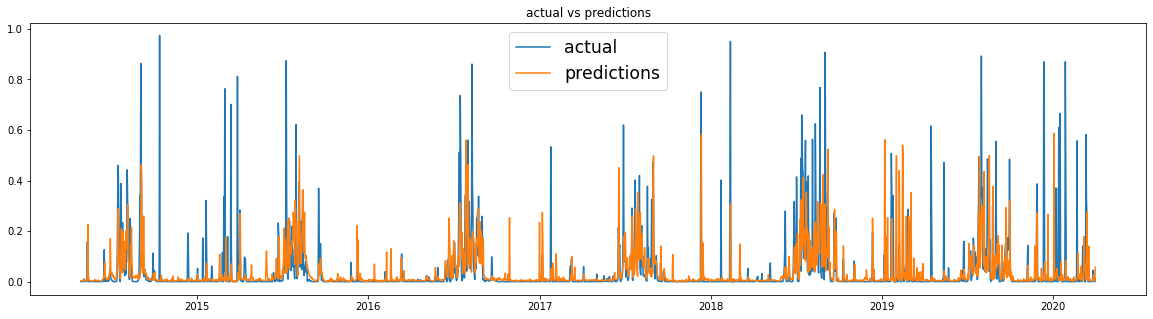

In [20]:
predictions = np.reshape(np.array(predictions),(2164,1))
indices = dataset.index.tolist()[-2164:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [21]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.439


In [22]:
indices = dataset.index.tolist()[-2164:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


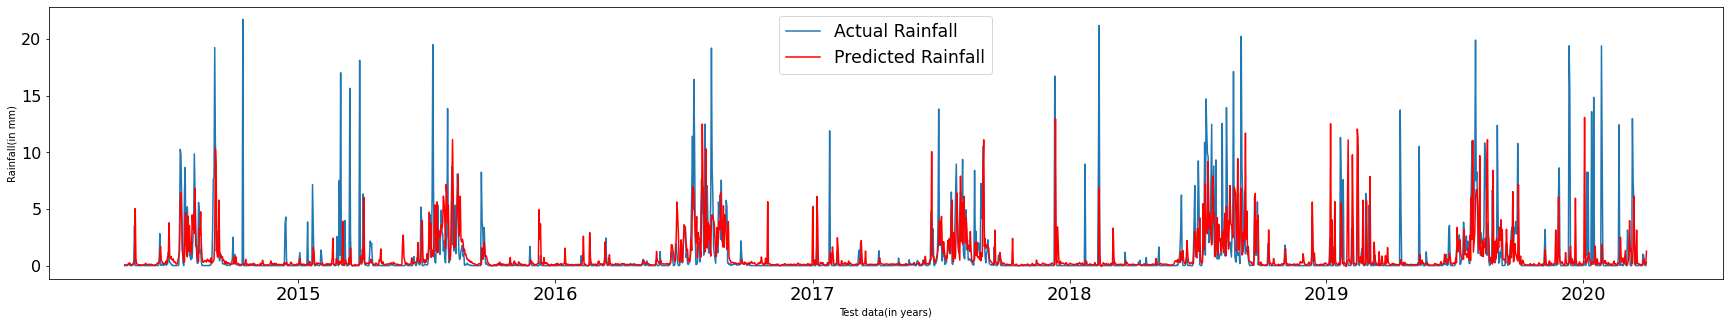

In [23]:
plt.figure(figsize=(30, 5))
plt.plot(df_test.index[-2164:], df_test['Rainfall'][-2164:],label = 'Actual Rainfall')
plt.plot(df_test.index[-2164:], df_test['Prediction'][-2164:], color='r',label = 'Predicted Rainfall')
plt.legend(loc='best', fontsize='xx-large')
plt.xlabel('Test data(in years)')
plt.ylabel('Rainfall(in mm)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# 3 STACKED LSTM WITH 512 UNITS

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:10592])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-1460], data[-1460:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences = True, input_shape=(n_timesteps, n_features)))
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences=True))
  model.add(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='complex_lstm'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.2,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.2)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [0]:
def model_configs():
# define scope of configs
  n_input = [2]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [35]
  n_batch = [256]
  n_diff = [0]
  drop = [0.03]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[2, 64, 3, 35, 256, 0, 0.03]] 0.033
done
[2, 64, 3, 35, 256, 0, 0.03] 0.03343945620507513


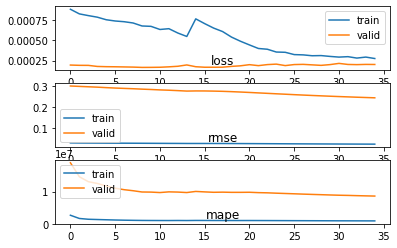

In [0]:
plot_history(model_history[0])

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.693


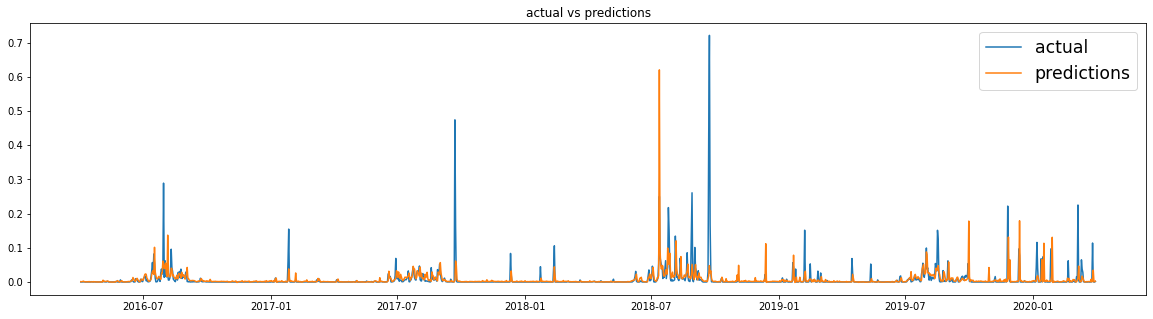

In [0]:
predictions = np.reshape(np.array(predictions),(1460,1))
indices = dataset.index.tolist()[-1460:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
indices = dataset.index.tolist()[-1460:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


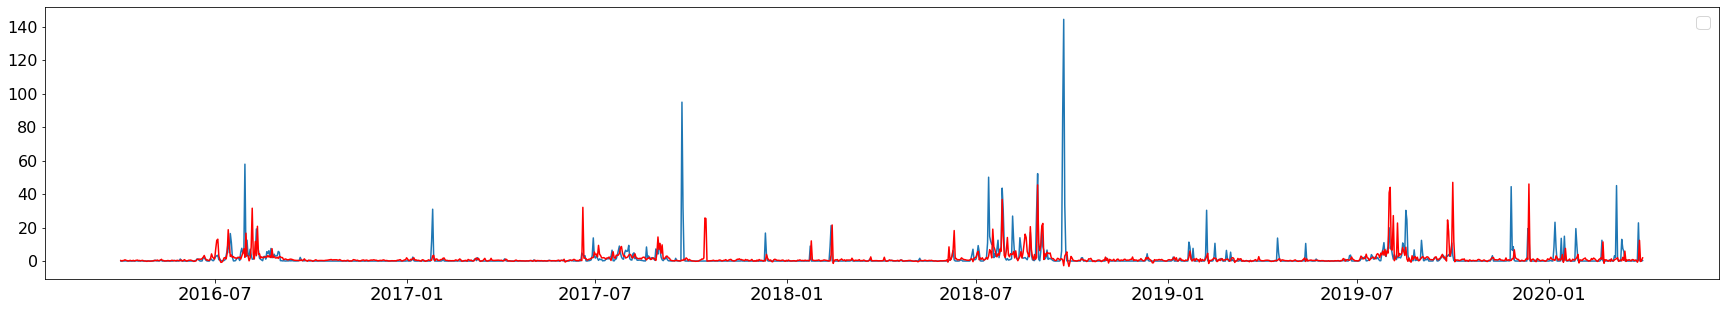

In [0]:
plt.figure(figsize=(30, 5))
plt.plot(df_test.index[-1460:], df_test['Rainfall'][-1460:])
plt.plot(df_test.index[-1460:], df_test['Prediction'][-1460:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# BIDIRECTIONAL LSTM WITH STACKED LAYERS

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(Bidirectional(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences = True, input_shape=(n_timesteps, n_features))))
  model.add(Bidirectional(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences=True)))
  model.add(Bidirectional(LSTM(512,dropout=drop,recurrent_dropout=drop, activation='relu')))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='complex_lstm'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.1,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.1)//n_batch),callbacks = callbacks)
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [42]:
def model_configs():
# define scope of configs
  n_input = [2]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [1]
  n_batch = [256]
  n_diff = [0]
  drop = [0.1]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[2, 64, 3, 1, 256, 0, 0.1]] 0.118
done
[2, 64, 3, 1, 256, 0, 0.1] 0.11763196173139143


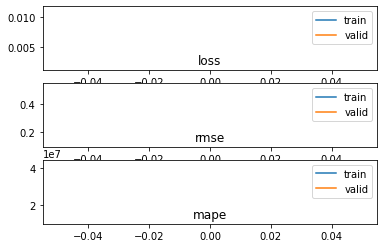

In [47]:
plot_history(model_history[0])

In [48]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.623


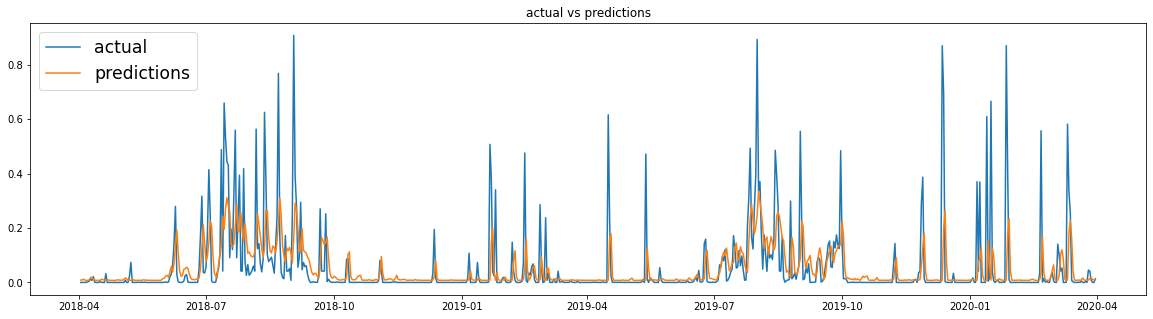

In [46]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
indices = dataset.index.tolist()[-1460:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

In [0]:
plt.figure(figsize=(30, 5))
plt.plot(df_test.index[-1460:], df_test['Rainfall'][-1460:])
plt.plot(df_test.index[-1460:], df_test['Prediction'][-1460:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# After outliers

# Simple Lstm

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:12573])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-730], data[-730:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(LSTM(200,dropout=drop,recurrent_dropout=drop, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='multiheaded_cnn'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.1,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.1)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [17]:

def model_configs():
# define scope of configs
  n_input = [120]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [45]
  n_batch = [256]
  n_diff = [0]
  drop = [0]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1


KeyboardInterrupt: ignored

In [0]:
plot_history(model_history[0])

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [0]:
indices = dataset.index.tolist()[-730:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[-730:], df_test['Rainfall'][-730:])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Rainfall'])
plt.plot(df_test.index[-730:], df_test['Prediction'][-730:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# 3 STacked GRU with 512 units

In [0]:
# split a univariate dataset into train/test sets
def split_dataset(data):
  scaler  = MinMaxScaler(feature_range=(0,1))
  #scaler = StandardScaler()
  scaler.fit(data[:10592])
  #mean = data[:12573].mean(axis=0)
  #data -= mean
  #std = data[:22573].std(axis=0)
  #data /= std
  train, test= data[:-1460], data[-1460:]
  train = scaler.transform(train)
  test = scaler.transform(test)
  return train,test,scaler

# evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  mse = mean_squared_error(actual, predicted)
  # calculate rmse
  rmse = sqrt(mse)
  # store
  scores.append(rmse)
  return scores

# summarize scores
def summarize_scores(name,scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=1):
  # flatten data
  data = train.copy()
  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
      X.append(data[in_start:in_end, :])
      y.append(data[in_end:out_end, 0])
    # move along one time step
    in_start += 1
  return array(X), array(y)
# plot training history
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()
# train the model
def build_model(train,cfg):
  # prepare data
  n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,drop = cfg
  train_x, train_y = to_supervised(train, n_input)
  #train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,test_size = 0.1,shuffle = False)
  # define parameters
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  # create a channel for each variable
  model = Sequential()
  model.add(GRU(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences = True, input_shape=(n_timesteps, n_features)))
  model.add(GRU(512,dropout=drop,recurrent_dropout=drop, activation='relu',return_sequences=True))
  model.add(GRU(512,dropout=drop,recurrent_dropout=drop, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()])
  # plot the model
  plot_model(model, show_shapes=True, to_file='STACKEDGRU'+str(cfg) +'.png')
  # fit network
  
  model_history = model.fit(train_x, train_y, epochs=n_epochs, batch_size= None, validation_split = 0.2,verbose=0,
                            steps_per_epoch=(len(train_x)//n_batch),validation_steps = (int(len(train_x)*0.2)//n_batch))
  return model,model_history

# make a forecast
def forecast(model, history, cfg):
  # flatten data
  data = array(history)
  # retrieve last observations for input data
  n_input,_,_,_,_,_ ,_= cfg
  input_x = data[-n_input:, :]
  # reshape into [1,n_input,n] 
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # forecast the next day
  yhat = model.predict(input_x, verbose=0)
  # we only want the vector forecast
  yhat = yhat[0]
  return yhat

# evaluate a single model
def evaluate_model(train,test, cfg):
  # fit model
  model,model_history = build_model(train,cfg)
  # history is a list of train data
  history = [x for x in train]
  # walk-forward validation over each day
  predictions = list()
  for i in range(len(test)):
    # predict the day
    yhat_sequence = forecast(model, history,cfg)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next day
    history.append(test[i, :])
  # evaluate predictions for each day
  predictions = array(predictions)
  scores = evaluate_forecasts(test[:,0], predictions)
  return scores,model_history,predictions
# score a model, return None on failure
def repeat_evaluate(train,test,cfg,n_repeats=1):
  # convert config to a key
  key = str(cfg)
  # fit and evaluate the model n times
  result = []
  for i in range(n_repeats):
    if i == (n_repeats-1):
      scores,model_history,predictions = evaluate_model(train,test,cfg) 
      result.append(scores)
    else:
      scores,_,_ = evaluate_model(train,test,cfg) 
      result.append(scores)
  # summarize score
  result = mean(result)
  print('> Model[%s] %.3f' % (key, result))
  return ((key,result),model_history,predictions)
  # grid search configs
def grid_search(train,test, cfg_list):
  # evaluate configs
  s =  [repeat_evaluate(train,test, cfg) for cfg in cfg_list]
  scores = []
  model_history = []
  predictions = []
  for i in range(len(s)):
    scores.append(s[i][0])
    model_history.append(s[i][1])
    predictions.append(s[i][2])  
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
  return scores,model_history,predictions

In [25]:
def model_configs():
# define scope of configs
  n_input = [6]
  n_filters = [64]
  n_kernels = [3]
  n_epochs = [35]
  n_batch = [256]
  n_diff = [0]
  drop = [0.03]
# create configs
  configs = list()
  for a in n_input:
    for b in n_filters:
      for c in n_kernels:
        for d in n_epochs:
          for e in n_batch:
            for f in n_diff:
              for g in drop:
                cfg = [a,b,c,d,e,f,g]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs


# split into train and test
train,test,scaler = split_dataset(dataset.values)
# model configs
cfg_list = model_configs()
# grid search
scores,model_history,predictions = grid_search(train,test, cfg_list)
print('done')
# list top configs
for cfg, error in scores:
  print(cfg, error)

Total configs: 1
> Model[[6, 64, 3, 35, 256, 0, 0.03]] 0.114
done
[6, 64, 3, 35, 256, 0, 0.03] 0.11419015667417935


In [0]:
plot_history(model_history[0])

In [0]:
predictions = np.reshape(np.array(predictions),(730,1))
indices = dataset.index.tolist()[-730:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
predicitions = predictions.values
test = test.values
# invert scaling for forecast
inv_yhat = np.concatenate((predictions, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test[:,0].reshape((len(test), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

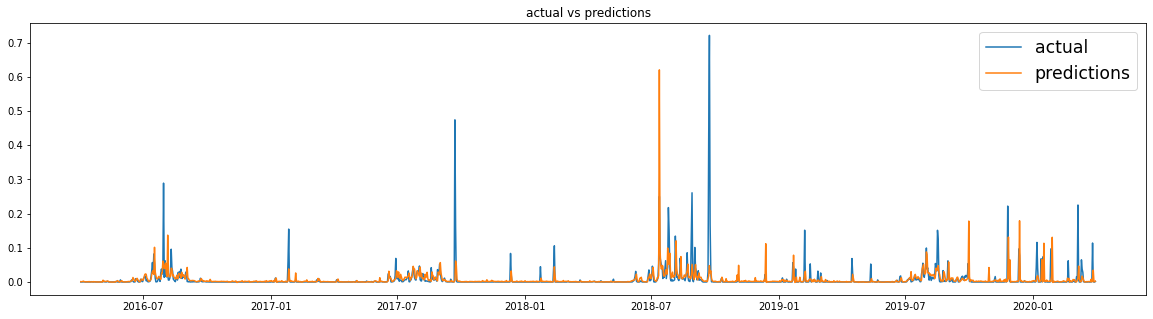

In [0]:
predictions = np.reshape(np.array(predictions),(1460,1))
indices = dataset.index.tolist()[-1460:]
test = pd.DataFrame(test,index = indices)
predictions = pd.DataFrame(predictions,index = indices)
fig = plt.figure(figsize=(20,5))
plt.plot(test[0],label = 'actual')
plt.plot(predictions[0],label = 'predictions')
plt.title('actual vs predictions')
plt.legend(loc='best', fontsize='xx-large')

In [0]:
indices = dataset.index.tolist()[-1460:]
df_predict = pd.DataFrame(inv_yhat,index= indices, columns=['Prediction'])
df_test = pd.concat([dataset,df_predict], axis=1)
df_test.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Prediction
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,NaN
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,NaN
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,NaN
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,NaN
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,NaN


No handles with labels found to put in legend.


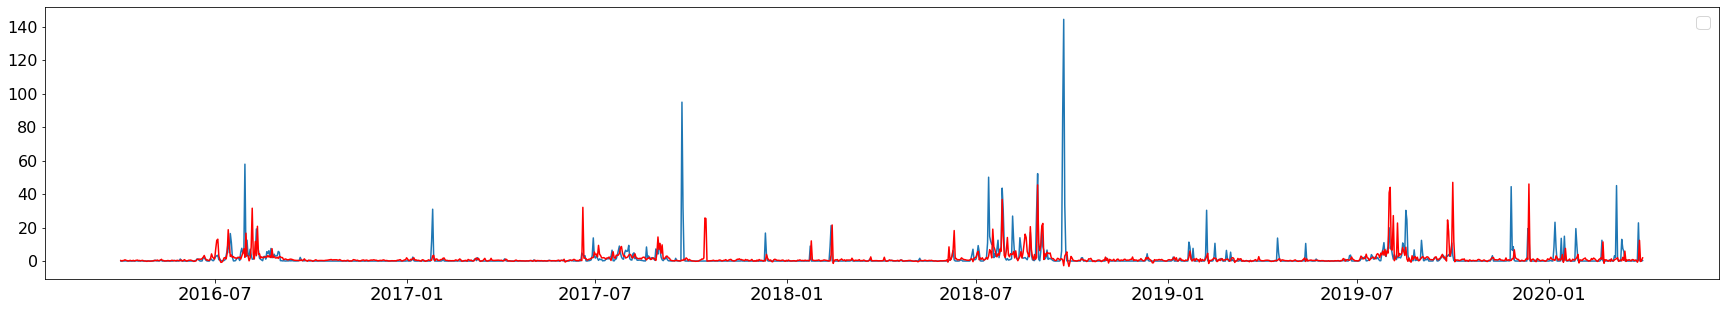

In [0]:
plt.figure(figsize=(30, 5))
plt.plot(df_test.index[-1460:], df_test['Rainfall'][-1460:])
plt.plot(df_test.index[-1460:], df_test['Prediction'][-1460:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()